In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from tslearn.generators import random_walk_blobs
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.neighbors import KNeighborsTimeSeriesClassifier, KNeighborsTimeSeries
from tslearn.piecewise import SymbolicAggregateApproximation
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("1.clean/outputs/62_main.csv")
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,date,kwh,th,th_state,tlr,tlr_state,tavg,tavg_state
0,2017-01-10 00:00:00,112,196.923309,0,184.000000,0,187.260139,0
1,2017-01-10 00:30:00,224,193.699251,0,184.000000,0,187.011574,0
2,2017-01-10 01:00:00,112,188.899867,0,183.927536,0,186.480827,0
3,2017-01-10 01:30:00,112,187.537138,0,183.000000,0,186.039855,0
4,2017-01-10 02:00:00,112,182.417572,0,183.000000,0,185.818841,0


In [5]:
X = df[['kwh']]
y = df['tavg_state']

In [6]:
scaler = TimeSeriesScalerMinMax(value_range=(0.,1.))
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test = X[:int(X.shape[0]*0.7)], X[int(X.shape[0]*0.7):]
y_train, y_test = y[:int(X.shape[0]*0.7)], y[int(X.shape[0]*0.7):]

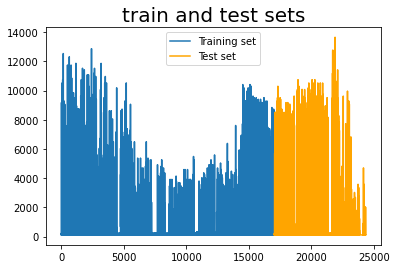

In [8]:
plt.title('train and test sets', size=20)
plt.plot(X_train, label='Training set')
plt.plot(X_test, label='Test set', color='orange')
plt.legend();

In [ ]:
# Nearest neighbor classification with a different metric (Euclidean distance)
knn_clf_e = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")
knn_clf_e.fit(X_train, y_train)
predicted_labels_e = knn_clf_e.predict(X_test)
print("\n3. Nearest neighbor classification using L2")
print("Correct classification rate:", accuracy_score(y_test, predicted_labels_e))

In [9]:
a = predicted_labels_e

In [10]:
b = y_test.values

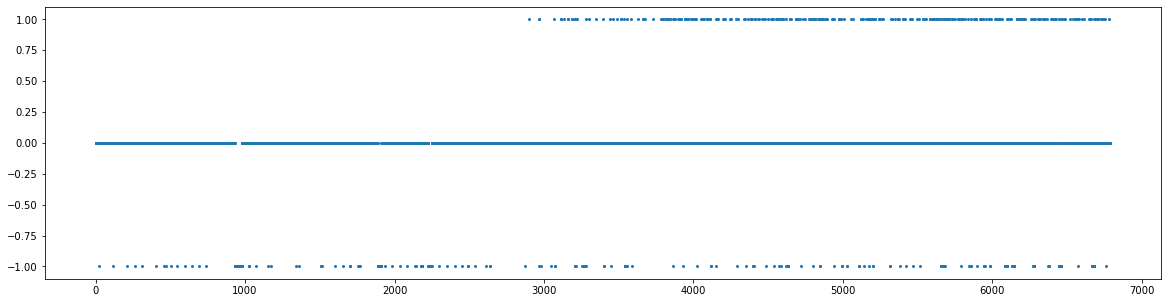

In [11]:
plt.figure(figsize=(20,5))
plt.plot(b - a,marker='o',linestyle='', markersize=2)

In [12]:
c = b - a
print(c.shape)

(6791,)


In [13]:
n_zeros = np.count_nonzero(c)
print(n_zeros)

657


In [15]:
657/6791

0.09674569282874393